# Case Study:  How Does a Bike-Share Navigate Speedy Success - [combined.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Processing">Data Processing</a></li>
<li><a href="#da">Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

This study aims to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
we will design a new marketing strategy to convert casual riders into annual members
       

## Dataset Description 

> Lyft Bikes and Scooters, LLC (“Bikeshare”) operates the City of Chicago’s (“City”) Divvy bicycle sharing service. Bikeshare and the City are committed to supporting bicycling as an alternative transportation option. As part of that commitment, the City permits Bikeshare to make certain Divvy system data owned by the City (“Data”) available to the public, subject to the terms and conditions of this License Agreement (“Agreement”). By accessing or using any of the Data, you agree to all of the terms and conditions of this Agreement.
> The dataset contains trips data of the last 12 months; from December, 2021 till November 2022

## Question(s) for Analysis
>1- How do annual members and casual riders use Cyclistic bikes differently?
    
>2- Why would casual riders buy Cyclistic annual memberships?
    

## Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling

In this section of the report, I will load the data, check for cleanliness, and then trim and clean my dataset for analysis.

In [2]:
os.chdir("C:/Users/Ahmed/Downloads/Google case study/Last 12 months")

In [3]:
#Make a folder of all CSV files in the working directory
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
#export to csv
combined_csv.to_csv("combined.csv", index=False, encoding='utf-8-sig')

In [5]:
#reset dataframe indexing
combined_csv = combined_csv.reset_index(drop=True)

In [6]:
# defining info of the dataset
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733451 entries, 0 to 5733450
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 568.7+ MB


In [7]:
# Changing data type of Started_at and ended_at to datet_time
combined_csv[['started_at','ended_at']] = combined_csv[['started_at','ended_at']].apply(pd.to_datetime)

In [8]:
# A quick analysis for the dataset
combined_csv.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.733451e+06,5.733451e+06,5.727577e+06,5.727577e+06
mean,4.190203e+01,-8.764786e+01,4.190223e+01,-8.764794e+01
std,4.643103e-02,3.022304e-02,6.796232e-02,1.077862e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766197e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762954e+01,4.193000e+01,-8.762954e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


In [9]:
# defining the number of duplicated rows
combined_csv.duplicated().sum()

0

<font color='red'>There are no duplicates</font>

In [10]:
# defining number of nulls in each column
combined_csv.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    854844
start_station_id      854844
end_station_name      915082
end_station_id        915082
start_lat                  0
start_lng                  0
end_lat                 5874
end_lng                 5874
member_casual              0
dtype: int64

<font color='red'>NA values will not affect the analysis, therefore there is no need to remove these rows </font>

<a id='Processing'></a>
# Data Processing

In this section I will add calculated fields

In [11]:
# Calculating the time needed for each trip
combined_csv["Trip_time"] = abs (combined_csv["ended_at"] - combined_csv["started_at"])

In [12]:
# Converting the time needed for each trip to minutes
combined_csv["Trip_time_minutes"] = abs(combined_csv["Trip_time"] / np.timedelta64(1, 'm'))

In [13]:
# Determine the start day of each trip
combined_csv["trip_start_day"] = combined_csv["started_at"].dt.day_name()

In [14]:
# Determine the end day of each trip
combined_csv["trip_end_day"] = combined_csv["ended_at"].dt.day_name()

In [15]:
# Calculate the latidude distance of each trip in latitude degree
y = combined_csv['end_lat'] - combined_csv['start_lat']
# Converting the trip distance to meters
combined_csv['distance in meter'] = abs(y *111320)

In [16]:
# Creating a new column to determine the route of the trip; from start station to end station
combined_csv["Route"] = combined_csv['start_station_name'] +" to "+ combined_csv["end_station_name"]

<a id='da'></a>
# Data Analysis

In this section I will do the analysis needed to answer the questions and to acheive the objective of the study

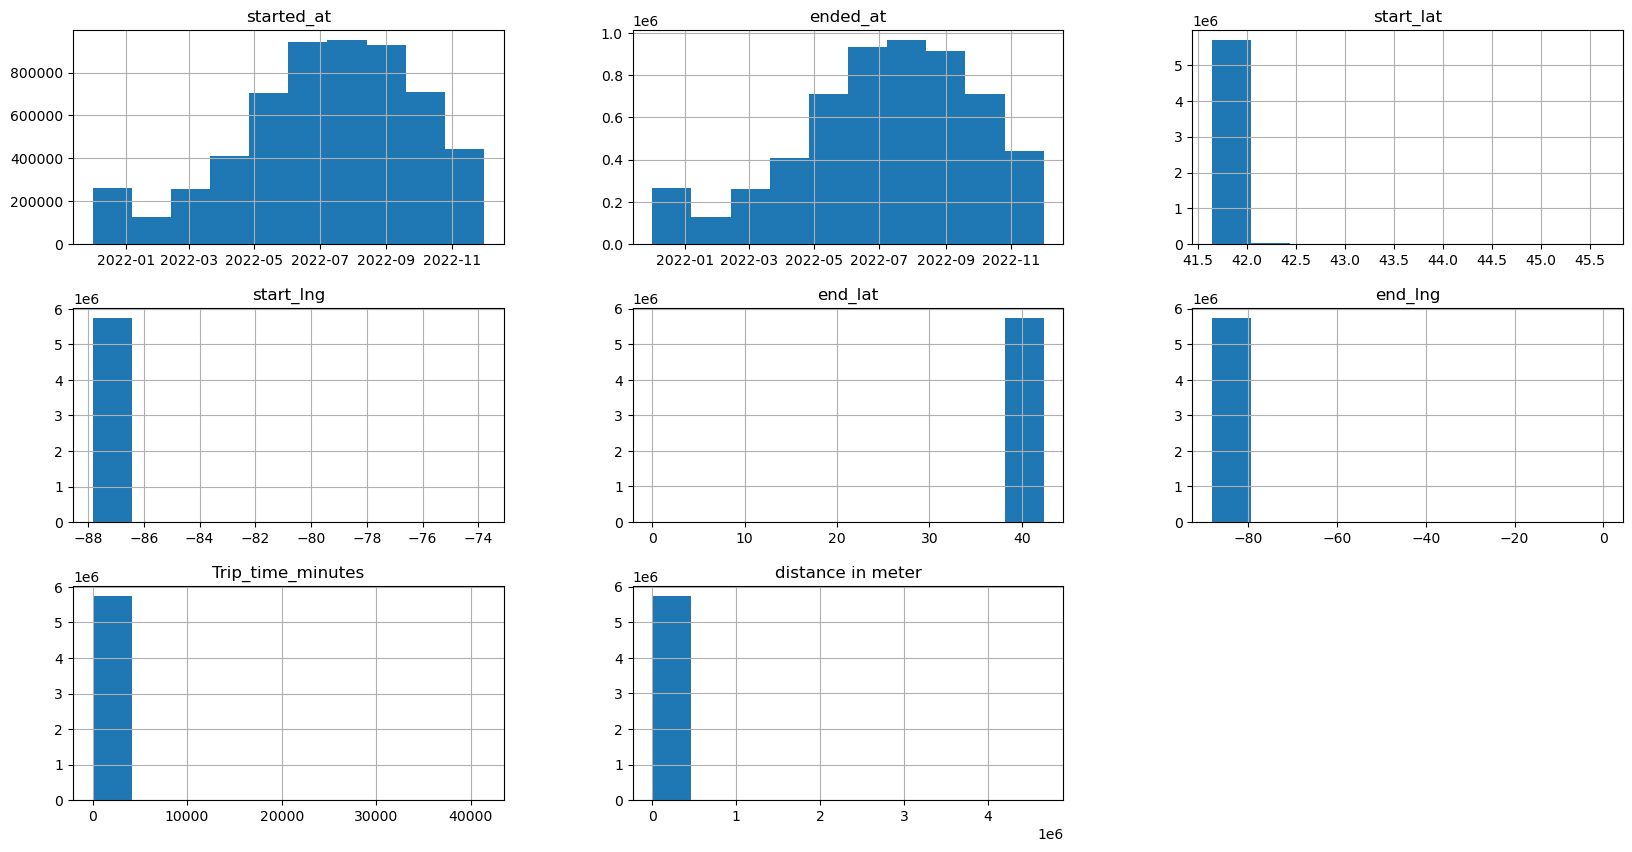

In [17]:
# Having an overall look on the data
combined_csv.hist(figsize=(20,10));

<font color='red'> The period from June 2022 to September 2022 was the period with the highest number of trips. </font>

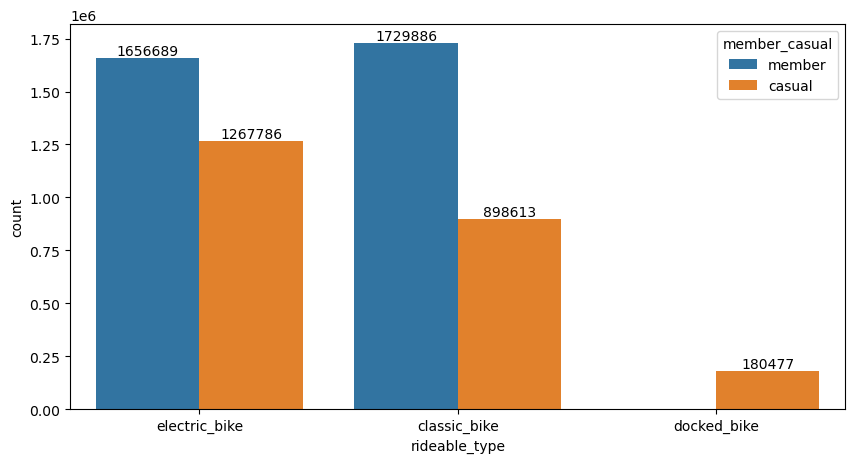

In [18]:
#Determining plot size
plt.figure(figsize=(10,5))

#plotting the graph, 
z = sns.countplot(x='rideable_type', hue = 'member_casual', data = combined_csv)
for p in z.patches:
    z.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

<font color='red'> Electric bikes were the most preferred for casual riders.<font color='red'> 

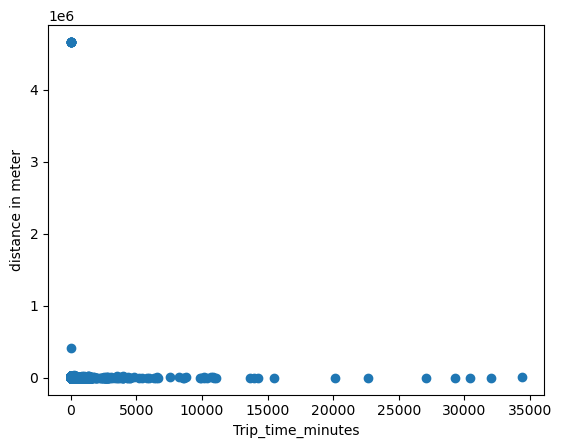

In [19]:
#Draw a scatter plot to detect if there are outliers
x = combined_csv['Trip_time_minutes']
y = combined_csv['distance in meter']
plt.scatter(x,y)
plt.xlabel('Trip_time_minutes')
plt.ylabel('distance in meter')
plt.show()

<font color='red'>Since there was some outliers, therefore analyzing the trip time and distance with respect to the median is the appropriate approach.  </font>

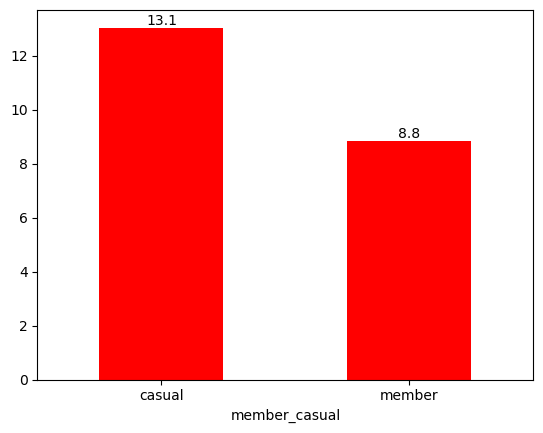

In [20]:
#Grouping the distance in meters travelled by members and casuals
y=combined_csv.groupby('member_casual')['Trip_time_minutes'].median()

#Plotting the graph
plot = y.plot(kind = 'bar', color = 'red')

#Adjusting x-axis labels
plt.xticks(rotation=360, ha='center')

#Showing data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(),'.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')


<font color='red'> Casual riders consume more time in trips with an average of 13.1 minutes per trip, while 8.8 minutes per trip for members. This indicates that customers tend to subscribe with cyclistic when their trip does not consume much time.   </font>

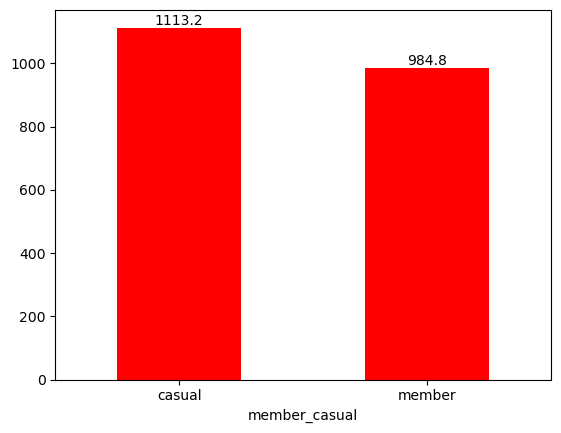

In [21]:
#Grouping the distance in meters travelled by members and casuals
y=combined_csv.groupby('member_casual')['distance in meter'].median()

#Plotting the graph
plot = y.plot(kind = 'bar', color = 'red')

#Adjusting x-axis labels
plt.xticks(rotation=360, ha='center')

#Showing data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(),'.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

<font color='red'> Again, the trips travelled by casual riders were farther in distance than the trips travelled by members.   </font>

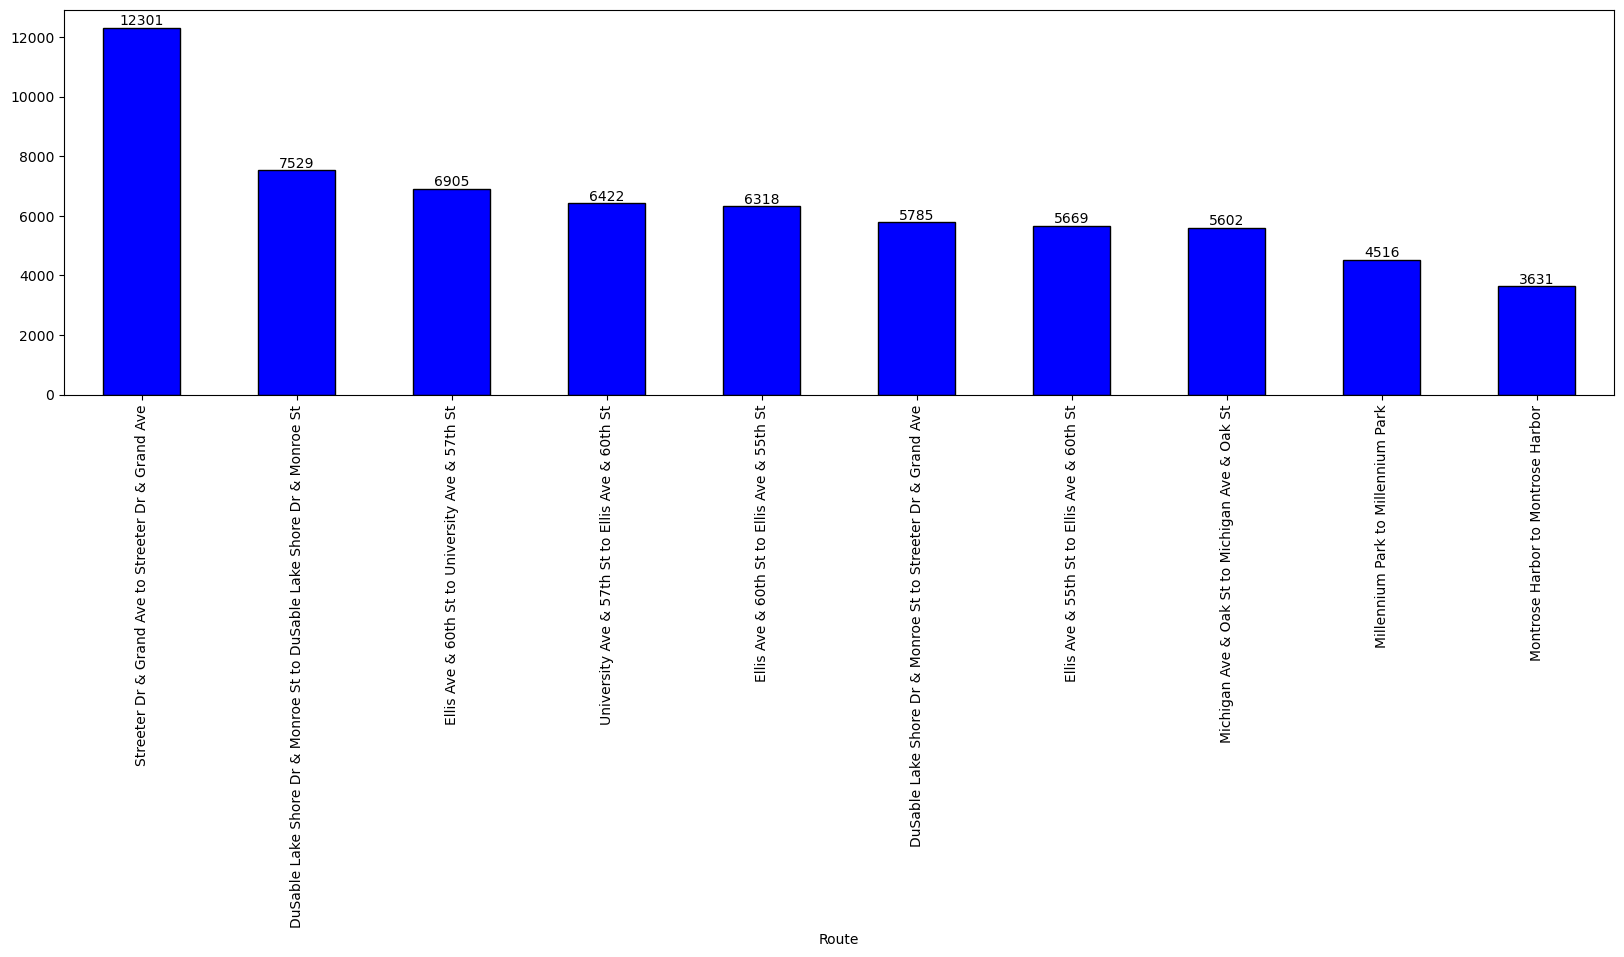

In [22]:
#Setting the size of the chart
plt.figure(figsize=[20,5])

#grouping the list by the count of each route
z = combined_csv.groupby('Route')['Route'].count().sort_values(ascending = False)

#showing the top 10 routes in terms of number of trips travelled on
z = z.head(10)

#plotting a bar graph
z= z.plot(kind = 'bar', fc = 'blue' , ec = 'black')

#Showing data labels
for p in z.patches:
    z.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

<font color='red'> The route from Streeter Dr & Grand ave station to the same station was the most travelled route with 12301 trips.   </font>

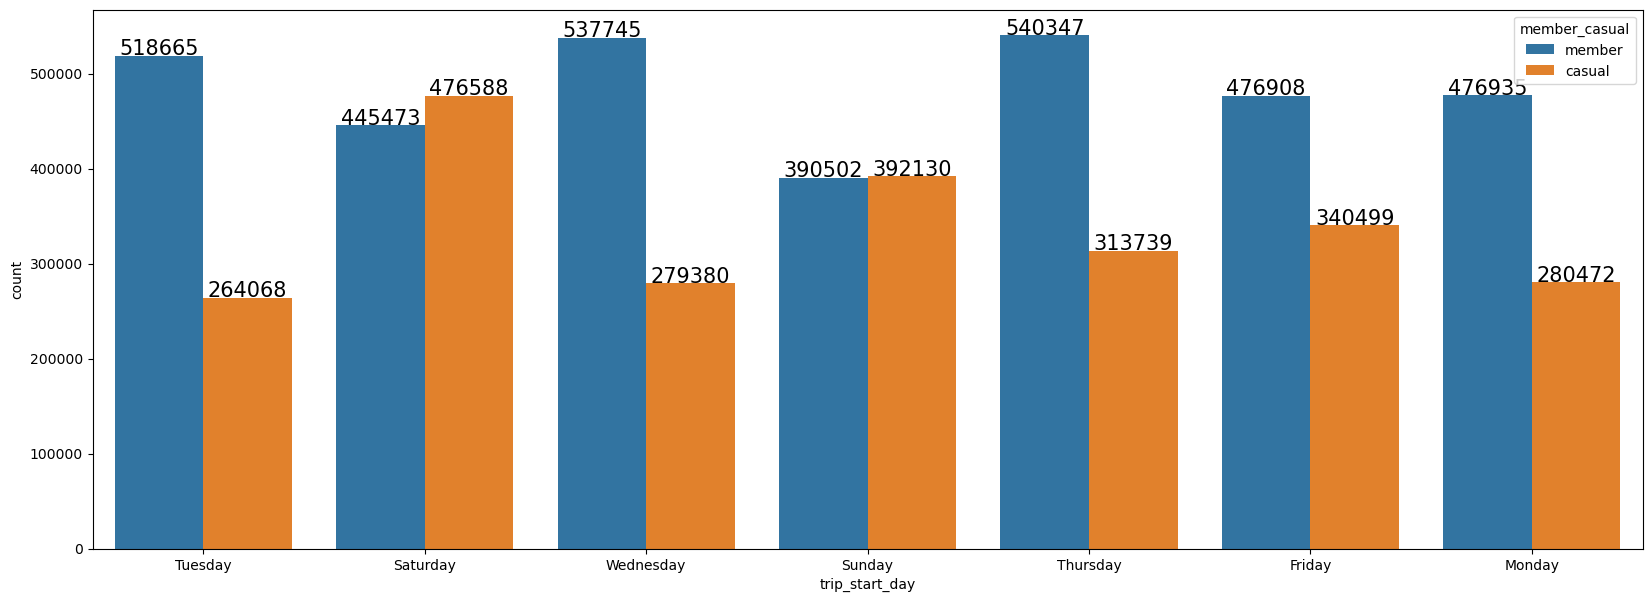

In [23]:
#Setting the size of the chart
plt.figure(figsize=[20,7])
           
#grouping the list by trip starting day among members and casuals
y = sns.countplot(x='trip_start_day', hue = 'member_casual', data = combined_csv)

#Showing data labels
for p in y.patches:
    y.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

<font color='red'> Saturday and Sunday were the days with the highest number of trips for casual riders

<a id='conclusions'></a>
# Conclusion

>- <font color='red'>The period from June 2022 to September 2022 was the period with the highest number of trips. </font>
    
>- <font color='red'> Electric bikes were the most preferred bike for casual riders.<font color='red'> 
    
>- <font color='red'> Casual riders consume more time in trips with an average of 13.1 minutes per trip, while 8.8 minutes per trip for members. This indicates that customers tend to subscribe with cyclistic when their trip does not consume much time. We can conduct focus groups in order to dig deep for the reasons behind the preference of Casual to trips of farther distance. </font>
    
>- <font color='red'> Again, the trips travelled by casual riders were farther in distance than the trips travelled by members.   </font>
    
>- <font color='red'> The route from Streeter Dr & Grand ave station to the same station was the most travelled route with 12301 trips.   </font>
    
>- <font color='red'> Casual riders did most of their trips on weekends.

In [ ]:
combined_csv.to_csv('data.csv')